In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
import pandas_profiling as pp

Adapted from: https://medium.com/@williamkoehrsen/data-analysis-with-python-19434f5d6324

In [2]:
# load csv files
batting = pd.read_csv('./core/Batting.csv')
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,0,0,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,0,0,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,5,0,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,2,2,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,3,0,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [3]:
# extract specific data from loaded csv's
years = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
batting_by_years = batting[batting['yearID'].isin(years)]

In [4]:
batting_by_years = batting_by_years.groupby(['playerID', 'yearID', 'teamID'], as_index=False).sum()
batting_by_years.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,aardsda01,2007,CHA,1,25,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,aardsda01,2008,BOS,1,47,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
2,aardsda01,2009,SEA,1,73,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,aardsda01,2010,SEA,1,53,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,aardsda01,2012,NYA,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,aardsda01,2013,NYN,1,43,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,aardsda01,2015,ATL,1,33,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
7,abadfe01,2010,HOU,1,22,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
8,abadfe01,2011,HOU,1,29,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,abadfe01,2012,HOU,1,37,7,0,1,0,0,0,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,1.0


In [5]:
batting_by_years.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000,15611.000000
mean,2012.090129,1.085901,49.098392,116.901864,15.146243,30.084043,5.979502,0.620844,3.487733,14.427071,1.997310,0.751842,10.773877,25.274934,0.779579,1.141375,0.977964,0.901928,2.634104
std,3.176328,0.298813,45.239775,178.353290,25.608784,49.132340,10.176789,1.524533,7.187889,25.207698,5.692988,1.839293,19.093810,37.822372,2.277744,2.503591,2.115748,1.789872,4.695903
min,2007.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,1.000000,32.000000,16.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2015.000000,1.000000,72.000000,170.000000,19.000000,41.000000,8.000000,0.000000,3.000000,18.000000,1.000000,1.000000,14.000000,36.500000,0.000000,1.000000,1.000000,1.000000,3.000000
max,2017.000000,6.000000,163.000000,716.000000,143.000000,238.000000,56.000000,23.000000,59.000000,156.000000,78.000000,23.000000,143.000000,223.000000,44.000000,30.000000,20.000000,15.000000,32.000000


In [6]:
batting_by_years.shape

(15611, 21)

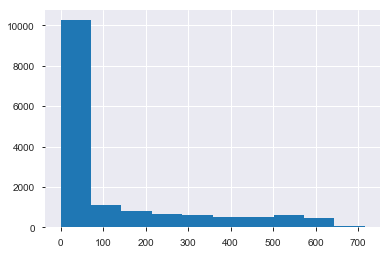

In [7]:
batting_by_years['AB'].hist()

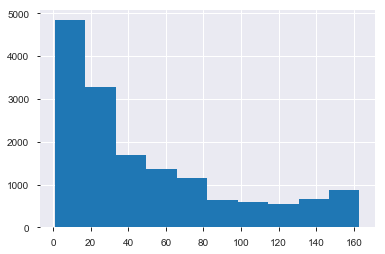

In [8]:
batting_by_years['G'].hist()

In [9]:
# filter to include only players with more than 20 games played and 20 at-bats
batting_by_years = batting_by_years[(batting_by_years['G'] >= 20) & 
                                    (batting_by_years['AB'] >= 20)]
batting_by_years.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0
21,abreubo01,2010,LAA,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0
22,abreubo01,2011,LAA,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0
24,abreubo01,2012,LAN,2,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0
25,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0
26,abreujo02,2014,CHA,1,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0


In [10]:
# # define a function that makes sure that only players that are in all five years are included
# def find_players_in_all_years(records):
#     # create list with all playerID's
#     list_of_IDs = list(records['playerID'])
#     all_years = set()
    
#     # iterate through list of ID's and count how many times it occurs in the list
#     for player in list_of_IDs:
#         if (list_of_IDs.count(player)) == len(years):
#             all_years.add(player)
            
#     # return dataframe with players in all desired years
#     return records[records['playerID'].isin(all_years)]


In [11]:
# create new dataframe using above function
# batting_by_years_agg = find_players_in_all_years(batting_by_years)
# batting_by_years_agg.head(20)

In [12]:
batting_by_years.shape

(6766, 21)

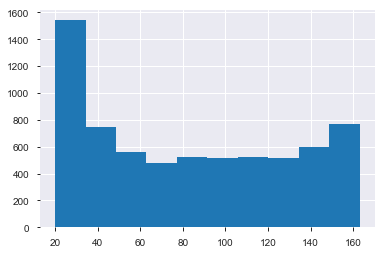

In [13]:
batting_by_years['G'].hist()

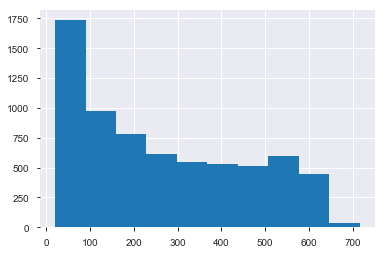

In [14]:
batting_by_years['AB'].hist()

In [15]:
# sns.pairplot(batting_by_years_agg)

In [16]:
# import people csv
people = pd.read_csv('../baseballdatabank/core/People.csv',
                    usecols=['playerID','nameFirst','nameLast',
                            'bats','throws','debut'])

In [17]:
# set index so that we can join with batting data
people.set_index('playerID', inplace=True)

In [18]:
# join batting dataframe with other relavent info from people
batting_by_years = batting_by_years.join(people, on='playerID', how='inner')

In [19]:
batting_by_years.isnull().sum()

playerID     0
yearID       0
teamID       0
stint        0
G            0
AB           0
R            0
H            0
2B           0
3B           0
HR           0
RBI          0
SB           0
CS           0
BB           0
SO           0
IBB          0
HBP          0
SH           0
SF           0
GIDP         0
nameFirst    0
nameLast     0
bats         0
throws       0
debut        0
dtype: int64

In [20]:
# create function that converts the bats and throws columns to numeric
def bats_throws(col):
    if col =='R':
        return 1
    else:
        return 0

In [21]:
# convert bats and throws columns
batting_by_years['throws_R'] = batting_by_years['throws'].apply(bats_throws)
batting_by_years['bats_R'] = batting_by_years['bats'].apply(bats_throws)
batting_by_years.head()

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,Reggie,Abercrombie,R,R,2006-04-04,1,1
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,Reggie,Abercrombie,R,R,2006-04-04,1,1
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,Bobby,Abreu,L,R,1996-09-01,1,0
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,Bobby,Abreu,L,R,1996-09-01,1,0
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,Bobby,Abreu,L,R,1996-09-01,1,0


In [22]:
# create column for batting average
batting_by_years['AVE'] = batting_by_years['H'] / batting_by_years['AB']

In [23]:
# compute plate appearances and on base percentage 
plate_appearances = batting_by_years['AB'] + batting_by_years['BB'] + batting_by_years['SF'] + batting_by_years['HBP']
batting_by_years['OBP'] = (batting_by_years['H'] + batting_by_years['BB'] + batting_by_years['HBP']) / plate_appearances

In [24]:
# create slugging percent column
single = ((batting_by_years['H'] - batting_by_years['2B']) - batting_by_years['3B']) - batting_by_years['HR']
batting_by_years['Slug_Percent'] = ((batting_by_years['HR'] * 4) +
                                        (batting_by_years['3B'] * 3) +
                                        (batting_by_years['2B'] * 2) +
                                        single) / batting_by_years['AB']

In [25]:
# create on base plus slugging percent column
hr = batting_by_years['HR'] * 4
triple = batting_by_years['3B'] * 3
double = batting_by_years['2B'] * 2
batting_by_years['OPS'] = batting_by_years['OBP'] + batting_by_years['Slug_Percent']

In [26]:
batting_by_years.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.197368,0.237500,0.315789,0.553289
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.309091,0.338983,0.509091,0.848074
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.282645,0.369099,0.444628,0.813727
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.295567,0.371345,0.471264,0.842609
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.293073,0.389805,0.435169,0.824974
21,abreubo01,2010,LAA,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.254799,0.352324,0.434555,0.786879
22,abreubo01,2011,LAA,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.252988,0.352740,0.364542,0.717282
24,abreubo01,2012,LAN,2,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.246154,0.360870,0.343590,0.704459
25,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.248120,0.341935,0.338346,0.680281
26,abreujo02,2014,CHA,1,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,Jose,Abreu,R,R,2014-03-31,1,1,0.316547,0.382637,0.580935,0.963572


In [27]:
batting_by_years.isnull().sum()

playerID        0
yearID          0
teamID          0
stint           0
G               0
AB              0
R               0
H               0
2B              0
3B              0
HR              0
RBI             0
SB              0
CS              0
BB              0
SO              0
IBB             0
HBP             0
SH              0
SF              0
GIDP            0
nameFirst       0
nameLast        0
bats            0
throws          0
debut           0
throws_R        0
bats_R          0
AVE             0
OBP             0
Slug_Percent    0
OPS             0
dtype: int64

In [28]:
from datetime import datetime

In [29]:
# convert debut to datetime
batting_by_years['debut'] = pd.to_datetime(batting_by_years['debut'])

In [30]:
# create new columns for debutYear and finalYear 
batting_by_years['debutYear'] = pd.to_numeric(batting_by_years['debut'].dt.strftime('%Y'), errors='coerce')
batting_by_years['currentYear'] = batting_by_years['yearID'] 
batting_by_years.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.197368,0.237500,0.315789,0.553289,2006,2007
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.309091,0.338983,0.509091,0.848074,2006,2008
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.282645,0.369099,0.444628,0.813727,1996,2007
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.295567,0.371345,0.471264,0.842609,1996,2008
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.293073,0.389805,0.435169,0.824974,1996,2009
21,abreubo01,2010,LAA,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.254799,0.352324,0.434555,0.786879,1996,2010
22,abreubo01,2011,LAA,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.252988,0.352740,0.364542,0.717282,1996,2011
24,abreubo01,2012,LAN,2,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.246154,0.360870,0.343590,0.704459,1996,2012
25,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.248120,0.341935,0.338346,0.680281,1996,2014
26,abreujo02,2014,CHA,1,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,Jose,Abreu,R,R,2014-03-31,1,1,0.316547,0.382637,0.580935,0.963572,2014,2014


In [31]:
# create a years in the league up to that point column
batting_by_years['YRSPRO'] = batting_by_years['currentYear'] - batting_by_years['debutYear']

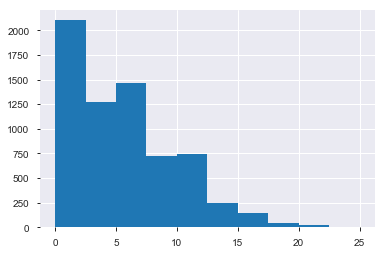

In [32]:
batting_by_years['YRSPRO'].hist()

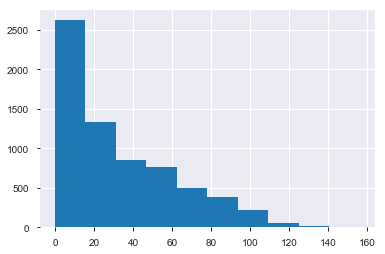

In [33]:
batting_by_years['RBI'].hist()

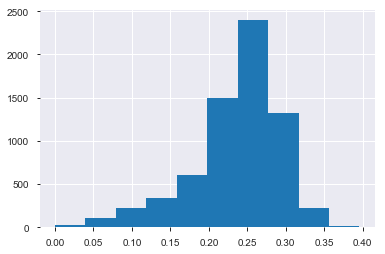

In [34]:
batting_by_years['AVE'].hist()

In [35]:
batting_by_years._get_numeric_data().columns

Index(['yearID', 'stint', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'throws_R',
       'bats_R', 'AVE', 'OBP', 'Slug_Percent', 'OPS', 'debutYear',
       'currentYear', 'YRSPRO'],
      dtype='object')

In [36]:
change_cols = ['G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
               'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP',
               'AVE', 'OBP', 'Slug_Percent', 'OPS']

# percent_change = batting_by_years[change_cols].pct_change().replace(np.inf, np.nan)

In [37]:
percent_change = batting_by_years.groupby('playerID')[change_cols].pct_change().replace(np.inf, np.nan)

In [38]:
percent_change.head()

,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,AVE,OBP,Slug_Percent,OPS
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,-0.028571,-0.276316,-0.375000,0.133333,0.666667,NaN,0.00,0.000000,-0.285714,1.000000,-0.500000,0.045455,NaN,0.000000,NaN,NaN,-1.000000,0.566061,0.427297,0.612121,0.532785
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,-0.012658,0.006612,-0.186992,0.052632,-0.025000,-0.20,0.25,-0.009901,-0.120000,0.375000,-0.130952,-0.052174,NaN,-0.666667,NaN,-0.857143,0.272727,0.045718,0.006086,0.059907,0.035494
20,-0.025641,-0.075534,-0.040000,-0.083333,-0.256410,-0.25,-0.25,0.030000,0.363636,-0.272727,0.287671,0.036697,2.5,0.000000,NaN,8.000000,0.071429,-0.008437,0.049711,-0.076593,-0.020930


In [39]:
# combine batting_by_years_agg and percent_change into a single dataframe
batter_and_change = pd.concat([batting_by_years, percent_change.rename(columns={
    'G': 'G_chg', 
    'AB': 'AB_chg', 
    'R': 'R_chg', 
    'H': 'H_chg', 
    '2B': '2B_chg', 
    '3B': '3B_chg', 
    'HR': 'HR_chg', 
    'RBI': 'RBI_chg', 
    'SB': 'SB_chg',
    'CS': 'CS_chg', 
    'BB': 'BB_chg', 
    'SO': 'SO_chg', 
    'IBB': 'IBB_chg', 
    'HBP': 'HBP_chg', 
    'SH': 'SH_chg', 
    'SF': 'SF_chg', 
    'GIDP': 'GIDP_chg',
    'AVE': 'AVE_chg', 
    'OBP': 'OBP_chg', 
    'Slug_Percent': 'Slug_chg', 
    'OPS': 'OPS_chg'
})], axis=1)

In [40]:
# fill nan values with 0
batter_and_change.fillna(0, inplace=True)

In [41]:
batter_and_change.shape

(6766, 56)

In [42]:
# batter_and_change.to_csv('batter_and_change.csv')

In [43]:
batter_and_change.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,G_chg,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.197368,0.237500,0.315789,0.553289,2006,2007,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.309091,0.338983,0.509091,0.848074,2006,2008,2,-0.028571,-0.276316,-0.375000,0.133333,0.666667,0.000000,0.000000,0.000000,-0.285714,1.000000,-0.500000,0.045455,0.000000,0.000000,0.0,0.000000,-1.000000,0.566061,0.427297,0.612121,0.532785
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.282645,0.369099,0.444628,0.813727,1996,2007,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.295567,0.371345,0.471264,0.842609,1996,2008,12,-0.012658,0.006612,-0.186992,0.052632,-0.025000,-0.200000,0.250000,-0.009901,-0.120000,0.375000,-0.130952,-0.052174,0.000000,-0.666667,0.0,-0.857143,0.272727,0.045718,0.006086,0.059907,0.035494
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.293073,0.389805,0.435169,0.824974,1996,2009,13,-0.025641,-0.075534,-0.040000,-0.083333,-0.256410,-0.250000,-0.250000,0.030000,0.363636,-0.272727,0.287671,0.036697,2.500000,0.000000,0.0,8.000000,0.071429,-0.008437,0.049711,-0.076593,-0.020930
21,abreubo01,2010,LAA,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.254799,0.352324,0.434555,0.786879,1996,2010,14,0.013158,0.017762,-0.083333,-0.115152,0.413793,-0.666667,0.333333,-0.242718,-0.200000,0.250000,-0.074468,0.168142,-0.571429,1.000000,0.0,-0.444444,-0.133333,-0.130594,-0.096154,-0.001410,-0.046177
22,abreubo01,2011,LAA,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.252988,0.352740,0.364542,0.717282,1996,2011,15,-0.077922,-0.123909,-0.386364,-0.130137,-0.268293,0.000000,-0.600000,-0.230769,-0.125000,-0.500000,-0.103448,-0.143939,0.666667,-0.500000,0.0,-0.400000,-0.384615,-0.007109,0.001180,-0.161115,-0.088447
24,abreubo01,2012,LAN,2,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.246154,0.360870,0.343590,0.704459,1996,2012,16,-0.352113,-0.611554,-0.481481,-0.622047,-0.733333,0.000000,-0.625000,-0.683333,-0.714286,-0.600000,-0.551282,-0.548673,-0.400000,-1.000000,-1.0,-1.000000,-0.250000,-0.027014,0.023048,-0.057475,-0.017876
25,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.248120,0.341935,0.338346,0.680281,1996,2014,18,-0.152174,-0.317949,-0.571429,-0.312500,0.125000,-1.000000,-0.666667,-0.263158,-0.833333,-1.000000,-0.428571,-0.588235,-1.000000,0.000000,0.0,0.000000,-0.500000,0.007989,-0.052468,-0.015262,-0.034321
26,abreujo02,2014,CHA,1,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,Jose,Abreu,R,R,2014-03-31,1,1,0.316547,0.382637,0.580935,0.963572,2014,2014,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [44]:
batter_and_change['bats_R'].value_counts(normalize=True)

1    0.553355
0    0.446645
Name: bats_R, dtype: float64

In [45]:
batter_and_change._get_numeric_data().columns

Index(['yearID', 'stint', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB',
       'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'throws_R',
       'bats_R', 'AVE', 'OBP', 'Slug_Percent', 'OPS', 'debutYear',
       'currentYear', 'YRSPRO', 'G_chg', 'AB_chg', 'R_chg', 'H_chg', '2B_chg',
       '3B_chg', 'HR_chg', 'RBI_chg', 'SB_chg', 'CS_chg', 'BB_chg', 'SO_chg',
       'IBB_chg', 'HBP_chg', 'SH_chg', 'SF_chg', 'GIDP_chg', 'AVE_chg',
       'OBP_chg', 'Slug_chg', 'OPS_chg'],
      dtype='object')

In [46]:
# AVE is the target, removed H, G, AB
attributes = ['stint', 'R', '2B', '3B', 'RBI', 'SB', 'CS', 
              'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP',
              'throws_R', 'bats_R', 'HR', 'OBP', 'Slug_Percent', 
              'OPS', 'YRSPRO', 'R_chg', '2B_chg', '3B_chg', 'RBI_chg', 
              'SB_chg', 'CS_chg', 'BB_chg', 'SO_chg', 'IBB_chg', 'HBP_chg', 
              'SH_chg', 'SF_chg', 'GIDP_chg', 'HR_chg', 'OBP_chg', 'Slug_chg', 'OPS_chg']

In [47]:
# create dataframe without target
data_attributes = batter_and_change[attributes]
data_attributes.head(20)

,stint,R,2B,3B,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,throws_R,bats_R,HR,OBP,Slug_Percent,OPS,YRSPRO,R_chg,2B_chg,3B_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,HR_chg,OBP_chg,Slug_chg,OPS_chg
16,1,16,3,0,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,1,1,2,0.237500,0.315789,0.553289,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17,1,10,5,0,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,1,1,2,0.338983,0.509091,0.848074,2,-0.375000,0.666667,0.000000,0.000000,-0.285714,1.000000,-0.500000,0.045455,0.000000,0.000000,0.0,0.000000,-1.000000,0.000000,0.427297,0.612121,0.532785
18,1,123,40,5,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,1,0,16,0.369099,0.444628,0.813727,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19,1,100,39,4,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,1,0,20,0.371345,0.471264,0.842609,12,-0.186992,-0.025000,-0.200000,-0.009901,-0.120000,0.375000,-0.130952,-0.052174,0.000000,-0.666667,0.0,-0.857143,0.272727,0.250000,0.006086,0.059907,0.035494
20,1,96,29,3,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,1,0,15,0.389805,0.435169,0.824974,13,-0.040000,-0.256410,-0.250000,0.030000,0.363636,-0.272727,0.287671,0.036697,2.500000,0.000000,0.0,8.000000,0.071429,-0.250000,0.049711,-0.076593,-0.020930
21,1,88,41,1,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,1,0,20,0.352324,0.434555,0.786879,14,-0.083333,0.413793,-0.666667,-0.242718,-0.200000,0.250000,-0.074468,0.168142,-0.571429,1.000000,0.0,-0.444444,-0.133333,0.333333,-0.096154,-0.001410,-0.046177
22,1,54,30,1,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,1,0,8,0.352740,0.364542,0.717282,15,-0.386364,-0.268293,0.000000,-0.230769,-0.125000,-0.500000,-0.103448,-0.143939,0.666667,-0.500000,0.0,-0.400000,-0.384615,-0.600000,0.001180,-0.161115,-0.088447
24,2,28,8,1,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,1,0,3,0.360870,0.343590,0.704459,16,-0.481481,-0.733333,0.000000,-0.683333,-0.714286,-0.600000,-0.551282,-0.548673,-0.400000,-1.000000,-1.0,-1.000000,-0.250000,-0.625000,0.023048,-0.057475,-0.017876
25,1,12,9,0,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,1,0,1,0.341935,0.338346,0.680281,18,-0.571429,0.125000,-1.000000,-0.263158,-0.833333,-1.000000,-0.428571,-0.588235,-1.000000,0.000000,0.0,0.000000,-0.500000,-0.666667,-0.052468,-0.015262,-0.034321
26,1,80,35,2,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,1,1,36,0.382637,0.580935,0.963572,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
ss = StandardScaler()
X_sc = ss.fit_transform(data_attributes)

C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [50]:
# import kmeans
from sklearn.cluster import KMeans
from sklearn import metrics

In [51]:
# create silhouette score dict
s_score_dict = {}
for i in range(2,11):
    km = KMeans(n_clusters=i, random_state=42)
    l = km.fit_predict(X_sc)
    s_score = metrics.silhouette_score(X_sc, l)
    s_score_dict[i] = [s_score]
    
s_score_dict

{2: [0.23232189030198871],
 3: [0.22461350117965928],
 4: [0.1092419967043815],
 5: [0.11569560584238528],
 6: [0.11767359760787179],
 7: [0.09734789292279199],
 8: [0.09702365618336004],
 9: [0.10704527681635623],
 10: [0.08107030911268656]}

In [52]:
kmeans_model = KMeans(n_clusters=6, random_state=42)
distances = kmeans_model.fit_transform(X_sc)
labels = kmeans_model.labels_

In [53]:
labels

array([5, 5, 1, ..., 5, 5, 0])

In [54]:
batter_and_change['KMeans_label'] = labels
attributes.append('KMeans_label')

batter_and_change.head(20)

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,G_chg,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg,KMeans_label
16,abercre01,2007,FLO,1,35,76,16,15,3,0,2,5.0,7.0,1.0,2,22.0,0.0,2.0,0.0,0.0,1.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.197368,0.237500,0.315789,0.553289,2006,2007,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5
17,abercre01,2008,HOU,1,34,55,10,17,5,0,2,5.0,5.0,2.0,1,23.0,0.0,2.0,1.0,1.0,0.0,Reggie,Abercrombie,R,R,2006-04-04,1,1,0.309091,0.338983,0.509091,0.848074,2006,2008,2,-0.028571,-0.276316,-0.375000,0.133333,0.666667,0.000000,0.000000,0.000000,-0.285714,1.000000,-0.500000,0.045455,0.000000,0.000000,0.0,0.000000,-1.000000,0.566061,0.427297,0.612121,0.532785,5
18,abreubo01,2007,NYA,1,158,605,123,171,40,5,16,101.0,25.0,8.0,84,115.0,0.0,3.0,0.0,7.0,11.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.282645,0.369099,0.444628,0.813727,1996,2007,11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
19,abreubo01,2008,NYA,1,156,609,100,180,39,4,20,100.0,22.0,11.0,73,109.0,2.0,1.0,0.0,1.0,14.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.295567,0.371345,0.471264,0.842609,1996,2008,12,-0.012658,0.006612,-0.186992,0.052632,-0.025000,-0.200000,0.250000,-0.009901,-0.120000,0.375000,-0.130952,-0.052174,0.000000,-0.666667,0.0,-0.857143,0.272727,0.045718,0.006086,0.059907,0.035494,1
20,abreubo01,2009,LAA,1,152,563,96,165,29,3,15,103.0,30.0,8.0,94,113.0,7.0,1.0,0.0,9.0,15.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.293073,0.389805,0.435169,0.824974,1996,2009,13,-0.025641,-0.075534,-0.040000,-0.083333,-0.256410,-0.250000,-0.250000,0.030000,0.363636,-0.272727,0.287671,0.036697,2.500000,0.000000,0.0,8.000000,0.071429,-0.008437,0.049711,-0.076593,-0.020930,0
21,abreubo01,2010,LAA,1,154,573,88,146,41,1,20,78.0,24.0,10.0,87,132.0,3.0,2.0,0.0,5.0,13.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.254799,0.352324,0.434555,0.786879,1996,2010,14,0.013158,0.017762,-0.083333,-0.115152,0.413793,-0.666667,0.333333,-0.242718,-0.200000,0.250000,-0.074468,0.168142,-0.571429,1.000000,0.0,-0.444444,-0.133333,-0.130594,-0.096154,-0.001410,-0.046177,0
22,abreubo01,2011,LAA,1,142,502,54,127,30,1,8,60.0,21.0,5.0,78,113.0,5.0,1.0,1.0,3.0,8.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.252988,0.352740,0.364542,0.717282,1996,2011,15,-0.077922,-0.123909,-0.386364,-0.130137,-0.268293,0.000000,-0.600000,-0.230769,-0.125000,-0.500000,-0.103448,-0.143939,0.666667,-0.500000,0.0,-0.400000,-0.384615,-0.007109,0.001180,-0.161115,-0.088447,0
24,abreubo01,2012,LAN,2,92,195,28,48,8,1,3,19.0,6.0,2.0,35,51.0,3.0,0.0,0.0,0.0,6.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.246154,0.360870,0.343590,0.704459,1996,2012,16,-0.352113,-0.611554,-0.481481,-0.622047,-0.733333,0.000000,-0.625000,-0.683333,-0.714286,-0.600000,-0.551282,-0.548673,-0.400000,-1.000000,-1.0,-1.000000,-0.250000,-0.027014,0.023048,-0.057475,-0.017876,5
25,abreubo01,2014,NYN,1,78,133,12,33,9,0,1,14.0,1.0,0.0,20,21.0,0.0,0.0,0.0,2.0,3.0,Bobby,Abreu,L,R,1996-09-01,1,0,0.248120,0.341935,0.338346,0.680281,1996,2014,18,-0.152174,-0.317949,-0.571429,-0.312500,0.125000,-1.000000,-0.666667,-0.263158,-0.833333,-1.000000,-0.428571,-0.588235,-1.000000,0.000000,0.0,0.000000,-0.500000,0.007989,-0.052468,-0.015262,-0.034321,5
26,abreujo02,2014,CHA,1,145,556,80,176,35,2,36,107.0,3.0,1.0,51,131.0,15.0,11.0,0.0,4.0,14.0,Jose,Abreu,R,R,2014-03-31,1,1,0.316547,0.382637,0.580935,0.963572,2014,2014,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [55]:
batter_and_change['KMeans_label'].value_counts()

5    3047
0    1561
4    1123
1     638
2     236
3     161
Name: KMeans_label, dtype: int64

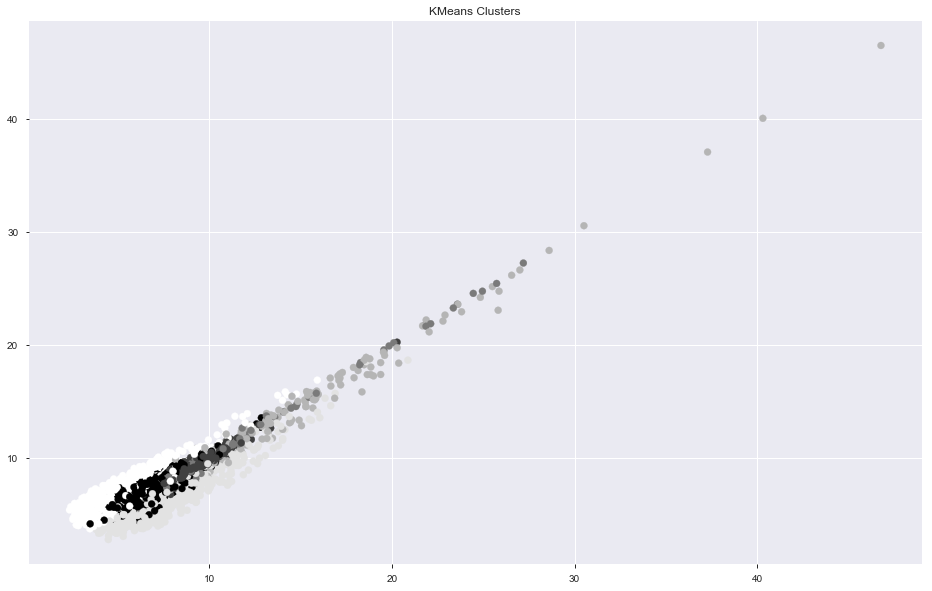

In [56]:
# create a scatter plot using labels from KMeans model as color
plt.figure(figsize=(16,10))
plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('KMeans Clusters')

plt.show()

In [57]:
batter_and_change[batter_and_change['KMeans_label'] == 4]

,playerID,yearID,teamID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,nameFirst,nameLast,bats,throws,debut,throws_R,bats_R,AVE,OBP,Slug_Percent,OPS,debutYear,currentYear,YRSPRO,G_chg,AB_chg,R_chg,H_chg,2B_chg,3B_chg,HR_chg,RBI_chg,SB_chg,CS_chg,BB_chg,SO_chg,IBB_chg,HBP_chg,SH_chg,SF_chg,GIDP_chg,AVE_chg,OBP_chg,Slug_chg,OPS_chg,KMeans_label
63,ackledu01,2016,NYA,1,28,61,6,9,0,0,0,4.0,0.0,0.0,8,9.0,0.0,0.0,0.0,1.0,0.0,Dustin,Ackley,L,R,2011-06-17,1,0,0.147541,0.242857,0.147541,0.390398,2011,2016,5,-0.670588,-0.672043,-0.727273,-0.775000,-1.000000,-1.0,-1.000000,-0.789474,-1.000000,-1.0,-0.428571,-0.763158,0.0,-1.0,-1.000000,-0.666667,-1.000000,-0.313934,-0.099221,-0.596432,-0.385393,4
104,adducji02,2014,TEX,1,44,101,13,17,3,0,1,8.0,3.0,1.0,10,27.0,0.0,0.0,1.0,2.0,2.0,Jim,Adduci,L,L,2013-09-01,0,0,0.168317,0.238938,0.227723,0.466661,2013,2014,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
111,adlemti01,2017,CIN,1,30,29,0,3,1,0,0,2.0,0.0,0.0,0,10.0,0.0,0.0,3.0,0.0,0.0,Tim,Adleman,R,R,2016-05-01,1,1,0.103448,0.103448,0.137931,0.241379,2016,2017,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
131,ahmedni01,2014,ARI,1,25,70,9,14,2,0,1,4.0,0.0,1.0,3,10.0,0.0,0.0,2.0,0.0,2.0,Nick,Ahmed,R,R,2014-06-29,1,1,0.200000,0.232877,0.271429,0.504305,2014,2014,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
144,alberha01,2015,TEX,1,41,99,12,22,2,1,0,4.0,1.0,0.0,2,17.0,0.0,0.0,3.0,0.0,2.0,Hanser,Alberto,R,R,2015-05-29,1,1,0.222222,0.237624,0.262626,0.500250,2015,2015,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
145,alberha01,2016,TEX,1,35,56,2,8,1,0,0,5.0,1.0,0.0,0,17.0,0.0,0.0,2.0,0.0,1.0,Hanser,Alberto,R,R,2015-05-29,1,1,0.142857,0.142857,0.160714,0.303571,2015,2016,1,-0.146341,-0.434343,-0.833333,-0.636364,-0.500000,-1.0,0.000000,0.250000,0.000000,0.0,-1.000000,0.000000,0.0,0.0,-0.333333,0.000000,-0.500000,-0.357143,-0.398810,-0.388049,-0.393161,4
146,alberma01,2007,HOU,1,31,29,0,2,0,0,0,0.0,0.0,0.0,0,17.0,0.0,0.0,3.0,0.0,0.0,Matt,Albers,L,R,2006-07-25,1,0,0.068966,0.068966,0.068966,0.137931,2006,2007,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4
170,alcanar01,2017,CIN,1,70,105,13,18,3,1,1,7.0,2.0,0.0,2,38.0,0.0,0.0,1.0,0.0,2.0,Arismendy,Alcantara,B,R,2014-07-09,1,0,0.171429,0.186916,0.247619,0.434535,2014,2017,3,0.000000,-0.622302,-0.580645,-0.684211,-0.727273,-0.5,-0.900000,-0.758621,-0.750000,-1.0,-0.882353,-0.591398,0.0,-1.0,0.000000,-1.000000,-0.333333,-0.163910,-0.264634,-0.325117,-0.300364,4
184,alfonel01,2009,SDN,1,37,114,6,20,3,0,2,8.0,0.0,0.0,3,34.0,0.0,0.0,0.0,0.0,0.0,Eliezer,Alfonzo,R,R,2006-06-03,1,1,0.175439,0.196581,0.254386,0.450967,2006,2009,3,0.423077,0.781250,0.200000,0.250000,0.500000,-1.0,1.000000,0.333333,0.000000,-1.0,0.500000,0.478261,-1.0,-1.0,0.000000,0.000000,-1.000000,-0.298246,-0.306793,-0.292143,-0.298605,4
205,almonab01,2015,SDN,1,31,54,6,11,3,0,0,4.0,1.0,1.0,5,19.0,0.0,0.0,3.0,0.0,1.0,Abraham,Almonte,B,R,2013-08-30,1,0,0.203704,0.271186,0.259259,0.530446,2013,2015,2,-0.392157,-0.696629,-0.800000,-0.765957,-0.666667,-1.0,-1.000000,-0.800000,-0.833333,0.0,-0.687500,-0.424242,0.0,0.0,0.000000,-1.000000,-0.750000,-0.228526,-0.156309,-0.430270,-0.316863,4


In [58]:
batter_and_change['yearID'].value_counts()

2011    637
2012    636
2015    624
2010    621
2014    613
2017    612
2013    609
2007    605
2008    605
2009    602
2016    602
Name: yearID, dtype: int64

In [70]:
batter_and_change['playerID'].value_counts()

pencehu01    13
drewst01     13
hillaa01     13
beltrca01    13
johnske05    13
bournmi01    13
gomezca01    13
phillbr01    12
uribeju01    12
suzukku01    12
gonzaad01    12
bonifem01    12
zobribe01    12
bruceja01    12
hollima01    12
bautijo02    12
cabreme01    12
byrdma01     12
reynoma01    12
cabreas01    12
tulowtr01    12
francje02    12
encared01    12
pradoma01    12
suzukic01    12
escobyu01    12
peraljh01    12
uptonju01    12
davisra01    12
youngch04    12
             ..
brugmja01     1
crabbca01     1
gindlca01     1
scrugxa01     1
aguilje01     1
butlejo04     1
clarkho02     1
willitr01     1
thompri02     1
chicoma01     1
moseldu01     1
curtico01     1
hammoro01     1
duranlu01     1
candeje01     1
suareal01     1
jonesja07     1
riggash01     1
segedro01     1
gilesma01     1
borchjo01     1
guthrje01     1
berryqu01     1
detwiro01     1
liebemi01     1
golsogr01     1
zawadla01     1
asuajca01     1
hamptmi01     1
alfarjo01     1
Name: playerID, Length: 

Modeling

In [71]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [72]:
# imports
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

In [73]:
# set X and y
X = batter_and_change[attributes]
y = batter_and_change['AVE']

Linear Regression

In [74]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [75]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print(lr.score(X_test, y_test))

0.9302611541068866


In [76]:
# gridsearch for best parameters

gs_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

lr_gridsearch = GridSearchCV(
    LinearRegression(),
    gs_params,
    cv=5,
    n_jobs=4,
    verbose=1
)

In [77]:
lr_gridsearch = lr_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.1s finished


In [78]:
# Best parameters on the training data:
lr_gridsearch.best_params_

{'fit_intercept': False, 'normalize': True}

In [125]:
# accuracy score on train data
lr_train = lr_gridsearch.best_score_
print(lr_train)

# assign the best estimator to a variable:
best_lr = lr_gridsearch.best_estimator_

# accuracy score on test data
lr_test = best_lr.score(X_test, y_test)
print(lr_test)

0.9272291522436715
0.9301812265171897


In [80]:
lrpreds = best_lr.predict(X_test)

In [116]:
# find the root mean squared error
mse = mean_squared_error(y_test, lrpreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
lr_score = rmse

RMSE: 0.01492084062909954


In [86]:
lrpreds

array([-0.00729619,  0.26135687,  0.26816007, ...,  0.20410266,
        0.14604075,  0.25625342])

In [87]:
y_test

1082     0.000000
14981    0.238889
497      0.282555
9776     0.263314
1234     0.253968
6852     0.230444
3299     0.238095
329      0.210145
15513    0.283537
9955     0.289855
5432     0.303030
5334     0.093750
13722    0.247788
145      0.142857
1235     0.252033
10363    0.255319
2359     0.201754
13446    0.285425
12690    0.288703
9167     0.172662
1108     0.226415
6288     0.294118
8115     0.301325
3655     0.204545
4679     0.225424
559      0.237113
2480     0.219858
1923     0.300987
3859     0.252918
14568    0.290123
           ...   
6776     0.259259
4315     0.231250
2660     0.241758
12572    0.224576
4154     0.304000
7069     0.286598
5947     0.071429
10726    0.253968
2445     0.291667
6524     0.230563
8427     0.187500
2662     0.241573
5944     0.148936
5203     0.236842
9472     0.166667
8857     0.213333
12528    0.133333
9915     0.248193
11743    0.206897
6283     0.289855
4388     0.246667
8798     0.280289
1375     0.131579
8889     0.273859
7827     0

In [88]:
results = pd.DataFrame()
results['y_true'] = y_test
results['lrpreds'] = lrpreds
results.head()

,y_true,lrpreds
1082,0.000000,-0.007296
14981,0.238889,0.261357
497,0.282555,0.268160
9776,0.263314,0.243586
1234,0.253968,0.245856


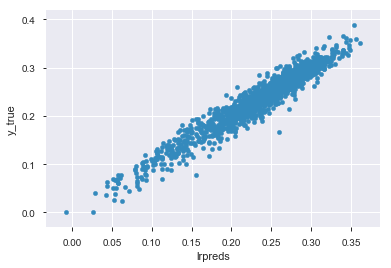

In [89]:
results.plot('lrpreds', 'y_true', kind='scatter')

Ridge

In [90]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [91]:
ss = StandardScaler()
X_train_poly_sc = ss.fit_transform(X_train_poly)
X_test_poly_sc = ss.fit_transform(X_test_poly)

In [92]:
ridge = Ridge()
ridge.fit(X_train_poly_sc, y_train)
print(ridge.score(X_test_poly_sc, y_test))

0.9535424958872522


In [93]:
# gridsearch for best parameters

gs_params = {
    'alpha': [1, 10, 100, 1000],
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

ridge_gridsearch = GridSearchCV(
    Ridge(),
    gs_params,
    cv=5,
    n_jobs=4,
    verbose=1
)

In [94]:
ridge_gridsearch = ridge_gridsearch.fit(X_train_poly_sc, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=4)]: Done  80 out of  80 | elapsed:   10.0s finished
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [95]:
# Best parameters on the training data:
ridge_gridsearch.best_params_

{'alpha': 100, 'fit_intercept': True, 'normalize': False}

In [126]:
# accuracy score on train data
ridge_train = ridge_gridsearch.best_score_
print(ridge_train)

# assign the best estimator to a variable:
best_ridge = ridge_gridsearch.best_estimator_

# accuracy score on test data
ridge_test = best_ridge.score(X_test_poly_sc, y_test)
print(ridge_test)

0.9446980712294054
0.9502373809278765


In [97]:
ridgepreds = best_ridge.predict(X_test_poly_sc)

In [117]:
# find the root mean squared error
mse = mean_squared_error(y_test, ridgepreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
ridge_score = rmse

RMSE: 0.012596758372695844


In [99]:
results['ridgepreds'] = ridgepreds
results.head()

,y_true,lrpreds,ridgepreds
1082,0.000000,-0.007296,-0.006771
14981,0.238889,0.261357,0.248926
497,0.282555,0.268160,0.273092
9776,0.263314,0.243586,0.246079
1234,0.253968,0.245856,0.245714


Lasso

In [100]:
lasso = Lasso()
lasso.fit(X_train_poly_sc, y_train)
print(lasso.score(X_test_poly_sc, y_test))

-0.00011112499373333584


In [101]:
# gridsearch for best parameters

gs_params = {
    'alpha': [0.001, 0.01, 0.1],
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'max_iter': [50, 500, 1000, 10000]
}

lasso_gridsearch = GridSearchCV(
    Lasso(),
    gs_params,
    cv=5,
    n_jobs=4,
    verbose=1
)

In [102]:
lasso_gridsearch = lasso_gridsearch.fit(X_train_poly_sc, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   39.6s
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:   42.7s finished
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [103]:
# Best parameters on the training data:
lasso_gridsearch.best_params_

{'alpha': 0.001, 'fit_intercept': True, 'max_iter': 500, 'normalize': False}

In [127]:
# accuracy score on train data
lasso_train = lasso_gridsearch.best_score_
print(lasso_train)

# assign the best estimator to a variable:
best_lasso = lasso_gridsearch.best_estimator_

# accuracy score on test data
lasso_test = best_lasso.score(X_test_poly_sc, y_test)
print(lasso_test)

0.9252685907219315
0.9285368015290839


In [105]:
lassopreds = best_lasso.predict(X_test_poly_sc)

In [118]:
# find the root mean squared error
mse = mean_squared_error(y_test, lassopreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
lasso_score = rmse

RMSE: 0.015095531509900936


In [107]:
results['lassopreds'] = lassopreds
results.head(20)

,y_true,lrpreds,ridgepreds,lassopreds
1082,0.000000,-0.007296,-0.006771,-0.004585
14981,0.238889,0.261357,0.248926,0.263952
497,0.282555,0.268160,0.273092,0.266304
9776,0.263314,0.243586,0.246079,0.244158
1234,0.253968,0.245856,0.245714,0.247580
6852,0.230444,0.225942,0.225743,0.221420
3299,0.238095,0.228507,0.229133,0.230551
329,0.210145,0.201123,0.204525,0.201168
15513,0.283537,0.297686,0.282473,0.278160
9955,0.289855,0.264163,0.270866,0.259912


Elastic Net

In [108]:
enet = ElasticNet()
enet.fit(X_train_poly_sc, y_train)
print(enet.score(X_test_poly_sc, y_test))

-0.00011112499373333584


In [109]:
# gridsearch for best parameters

gs_params = {
    'alpha': [0.001, 0.01, 0.1],
    'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9],
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'max_iter': [50, 500, 1000, 10000]
}

enet_gridsearch = GridSearchCV(
    ElasticNet(),
    gs_params,
    cv=5,
    n_jobs=4,
    verbose=1
)

In [110]:
enet_gridsearch = enet_gridsearch.fit(X_train_poly_sc, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   18.8s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  6.6min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  7.5min
[Parallel(n_jobs=4)]: Done 1200 out of 1200 | elapsed:  8.1min finished
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Mario Jr HP Laptop\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [111]:
# Best parameters on the training data:
enet_gridsearch.best_params_

{'alpha': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.1,
 'max_iter': 1000,
 'normalize': False}

In [128]:
# accuracy score on train data
enet_train = enet_gridsearch.best_score_
print(enet_train)

# assign the best estimator to a variable:
best_enet = enet_gridsearch.best_estimator_

# accuracy score on test data
enet_test = best_enet.score(X_test_poly_sc, y_test)
print(enet_test)

0.9493656425985639
0.9516139951719139


In [113]:
enetpreds = best_enet.predict(X_test_poly_sc)

In [119]:
# find the root mean squared error
mse = mean_squared_error(y_test, enetpreds)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')
enet_score = rmse

RMSE: 0.012421300435989524


In [115]:
results['enetpreds'] = enetpreds
results.head(20)

,y_true,lrpreds,ridgepreds,lassopreds,enetpreds
1082,0.000000,-0.007296,-0.006771,-0.004585,-0.009060
14981,0.238889,0.261357,0.248926,0.263952,0.254826
497,0.282555,0.268160,0.273092,0.266304,0.268410
9776,0.263314,0.243586,0.246079,0.244158,0.245958
1234,0.253968,0.245856,0.245714,0.247580,0.249694
6852,0.230444,0.225942,0.225743,0.221420,0.225172
3299,0.238095,0.228507,0.229133,0.230551,0.231580
329,0.210145,0.201123,0.204525,0.201168,0.204549
15513,0.283537,0.297686,0.282473,0.278160,0.289529
9955,0.289855,0.264163,0.270866,0.259912,0.268275


In [129]:
# function to display RMSE and Train and Test R2 scores

def rmse_scores(lr_score, ridge_score, lasso_score, enet_score,
               lr_train, lr_test, ridge_train, ridge_test, 
                lasso_train, lasso_test, enet_train, enet_test):
    print(f'Linear Regression RMSE: {lr_score}')
    print(f'Ridge RMSE: {ridge_score}')
    print(f'Lasso RMSE: {lasso_score}')
    print(f'ElasticNet RMSE: {enet_score}')
    print(f'Linear Regression Train R2 Score: {lr_train}')
    print(f'Linear Regression Test R2 Score: {lr_test}')
    print(f'Ridge Train R2 Score: {ridge_train}')
    print(f'Ridge Test R2 Score: {ridge_test}')
    print(f'Lasso Train R2 Score: {lasso_train}')
    print(f'Lasso Test R2 Score: {lasso_test}')
    print(f'ElasticNet Train R2 Score: {enet_train}')
    print(f'ElasticNet Test R2 Score: {enet_test}')
    return
    

In [131]:
rmse_scores(lr_score, ridge_score, lasso_score, enet_score,
            lr_train, lr_test, ridge_train, ridge_test, 
            lasso_train, lasso_test, enet_train, enet_test)

Linear Regression RMSE: 0.01492084062909954
Ridge RMSE: 0.012596758372695844
Lasso RMSE: 0.015095531509900936
ElasticNet RMSE: 0.012421300435989524
Linear Regression Train R2 Score: 0.9272291522436715
Linear Regression Test R2 Score: 0.9301812265171897
Ridge Train R2 Score: 0.9446980712294054
Ridge Test R2 Score: 0.9502373809278765
Lasso Train R2 Score: 0.9252685907219315
Lasso Test R2 Score: 0.9285368015290839
ElasticNet Train R2 Score: 0.9493656425985639
ElasticNet Test R2 Score: 0.9516139951719139


In [139]:
batter_and_change['playerID'].value_counts()

pencehu01    13
drewst01     13
hillaa01     13
beltrca01    13
johnske05    13
bournmi01    13
gomezca01    13
phillbr01    12
uribeju01    12
suzukku01    12
gonzaad01    12
bonifem01    12
zobribe01    12
bruceja01    12
hollima01    12
bautijo02    12
cabreme01    12
byrdma01     12
reynoma01    12
cabreas01    12
tulowtr01    12
francje02    12
encared01    12
pradoma01    12
suzukic01    12
escobyu01    12
peraljh01    12
uptonju01    12
davisra01    12
youngch04    12
             ..
brugmja01     1
crabbca01     1
gindlca01     1
scrugxa01     1
aguilje01     1
butlejo04     1
clarkho02     1
willitr01     1
thompri02     1
chicoma01     1
moseldu01     1
curtico01     1
hammoro01     1
duranlu01     1
candeje01     1
suareal01     1
jonesja07     1
riggash01     1
segedro01     1
gilesma01     1
borchjo01     1
guthrje01     1
berryqu01     1
detwiro01     1
liebemi01     1
golsogr01     1
zawadla01     1
asuajca01     1
hamptmi01     1
alfarjo01     1
Name: playerID, Length: 